In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio

In [3]:
import sys

sys.path.append('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/SCOPE_simulations')

from FLD_methods import * # import the necessary FLD methods needed to convolute signals and retrieve SIF

In [4]:
e_pathname = '/Users/jameswallace/Desktop/SCOPE_crops/sparse_old_unstressed_wheat/Eout_spectrum.csv'

In [5]:
e_spectra = get_simulated_spectral_df(e_pathname)

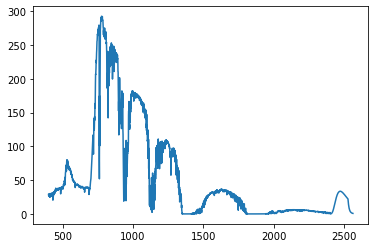

In [6]:
plt.plot(e_spectra.iloc[0])

In [7]:
e_orignal = np.asarray(e_spectra.iloc[0])

In [8]:
fwhm = [3, 4, 5]
e_resampled_spectra = [[], [], []]
resampled_bands = [[], [], []]

In [9]:
for i in range(len(e_resampled_spectra)):
    e_resampled_spectra[i], resampled_bands[i] = resample_spectra(fwhm[i], e_orignal)

(750.0, 775.0)

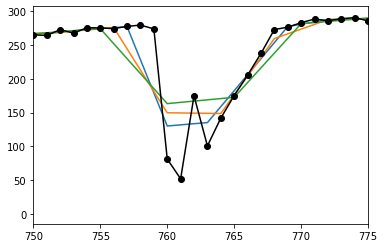

In [10]:
for i in range(len(e_resampled_spectra)):
    plt.plot(resampled_bands[i], e_resampled_spectra[i])

plt.plot(np.arange(400, 2562), e_spectra.iloc[0], color = 'k', marker = 'o')
plt.xlim(750, 775)

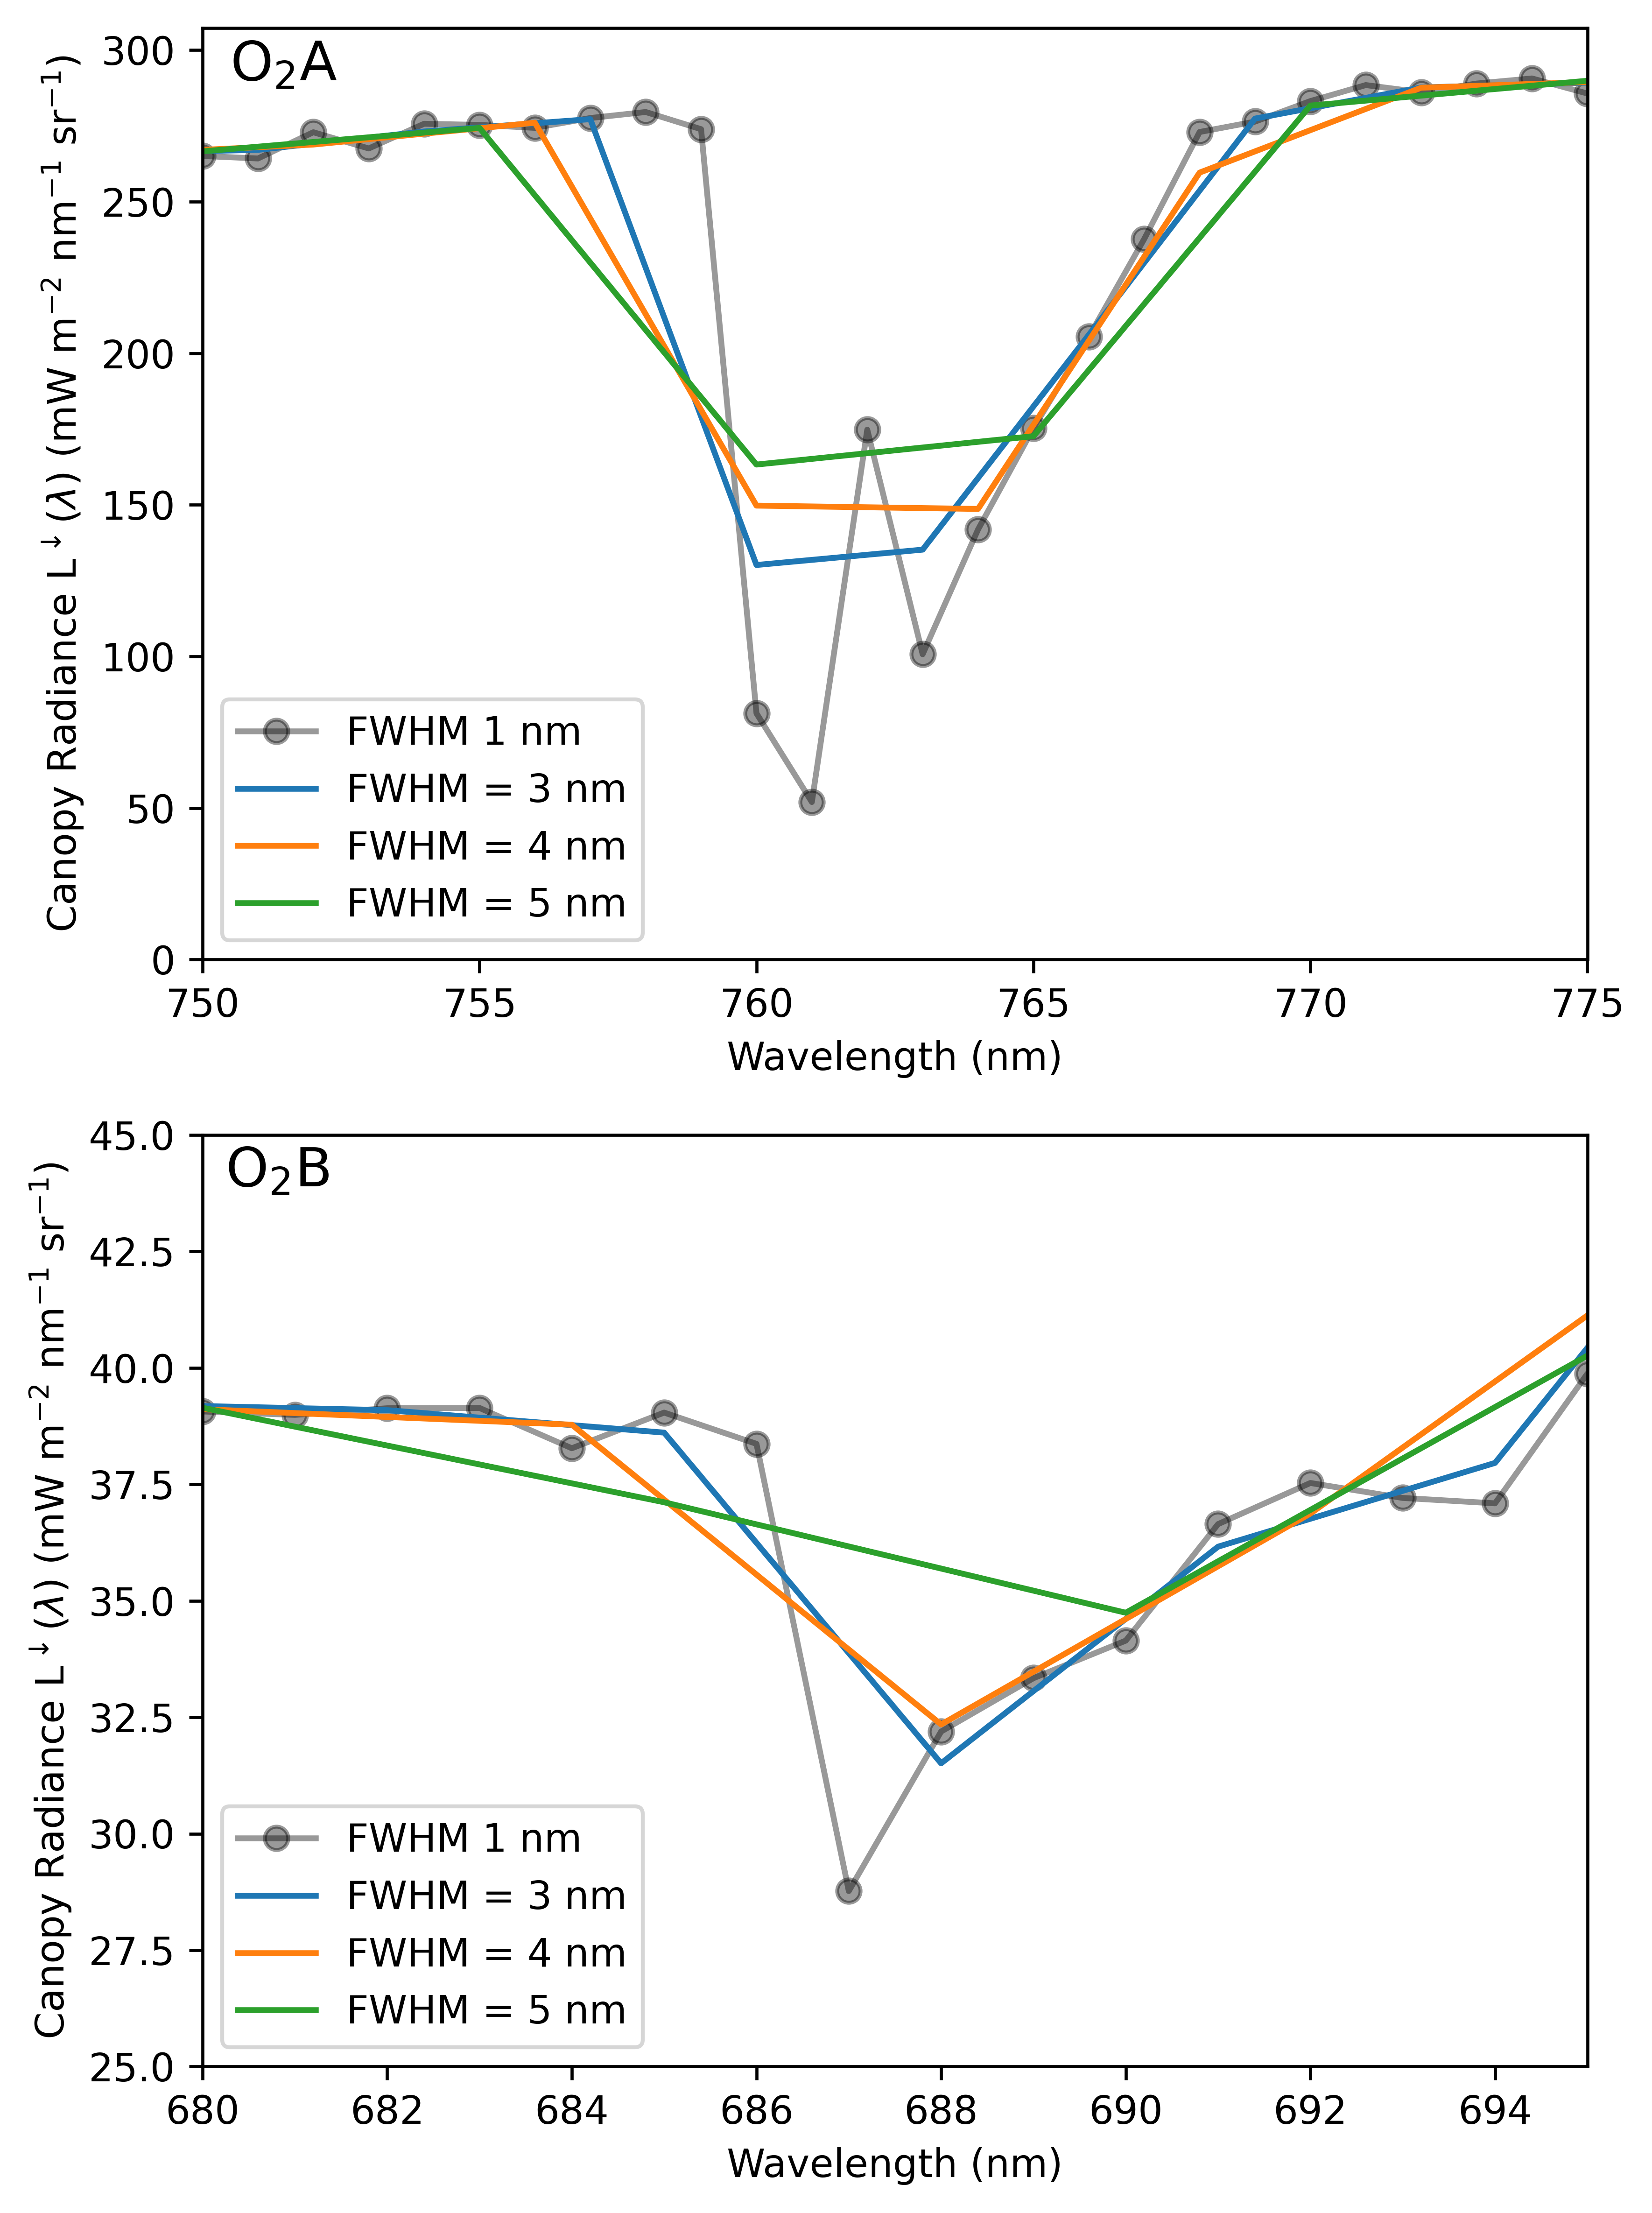

In [37]:
fig, ax = plt.subplots(2, 1, sharey=False, figsize = (6, 8), dpi = 600)

for i in range(2):
    ax[i].plot(np.arange(400, 2562), e_spectra.iloc[0], color = 'k', marker = 'o', alpha = 0.4, label = 'FWHM 1 nm')
    ax[i].set_ylabel(r'Canopy Radiance L$^{\downarrow}$($\lambda$) (mW m$^{-2}$ nm$^{-1}$ sr$^{-1}$)')
    ax[i].set_xlabel(r'Wavelength (nm)')
    
for i in range(len(e_resampled_spectra)):
    ax[0].plot(resampled_bands[i], e_resampled_spectra[i], label = 'FWHM = %d nm'%fwhm[i])
    ax[1].plot(resampled_bands[i], e_resampled_spectra[i], label = 'FWHM = %d nm'%fwhm[i])

ax[0].set_xlim(750, 775)
ax[1].set_xlim(680, 695)
ax[1].set_ylim(25, 45)
ax[0].set_ylim(0)

ax[0].text(750.5, 290, r'O$_{2}$A', fontsize = 14)
ax[1].text(680.25, 43.9, r'O$_{2}$B', fontsize = 14)

ax[0].legend(loc = 'lower left')
ax[1].legend(loc = 'lower left')

fig.tight_layout()

In [12]:
# test getting irradiance spectra from tarp on KatiKati dataset

In [13]:
tarp_pathname = '/Users/jameswallace/Desktop/KatiKati2020_tarp.csv'
katikati_2020_pathname = '/Users/jameswallace/Desktop/Katikati_2020.csv'
combined_katikati = '/Users/jameswallace/Desktop/4648_combined_ASD_HSI.xlsx'

In [163]:
tarp_df = pd.read_csv(tarp_pathname, skiprows = 7)

In [164]:
tarp_df = tarp_df.drop(0)

In [165]:
tarp_df

,; File X,File Y,Map X,Map Y,Lat,Lon,B1,B2,B3,B4,...,B440,B441,B442,B443,B444,B445,B446,B447,B448,B449
1,771,15730.0,409026.118,5835708.15,-37.621241,175.969113,3188.0,5423.0,8059.0,10989.0,...,18663.0,17846.0,18530.0,17846.0,17400.0,17400.0,33733.0,41850.0,33733.0,25343.0
2,770,15730.0,409025.118,5835708.15,-37.621240,175.969102,3187.0,5422.0,8563.0,10013.0,...,12284.0,12420.0,12241.0,12420.0,13145.0,14449.0,21148.0,27656.0,21148.0,15147.0
3,770,15731.0,409025.118,5835707.15,-37.621249,175.969102,4209.0,5791.0,9032.0,10990.0,...,21414.0,20500.0,20500.0,20500.0,20415.0,20415.0,20415.0,45663.0,45663.0,33035.0
4,771,15731.0,409026.118,5835707.15,-37.621250,175.969113,3833.0,5791.0,9031.0,9577.0,...,20887.0,20771.0,20179.0,20179.0,19938.0,21434.0,35292.0,46515.0,35292.0,26583.0
5,769,15731.0,409024.118,5835707.15,-37.621249,175.969091,4209.0,5423.0,9925.0,10772.0,...,18663.0,17846.0,18530.0,17846.0,16641.0,16641.0,33733.0,41113.0,33733.0,23069.0
6,770,15732.0,409025.118,5835706.15,-37.621258,175.969102,3833.0,5257.0,7500.0,9048.0,...,19129.0,19129.0,19186.0,20189.0,19961.0,21454.0,35538.0,46787.0,35538.0,24469.0
7,769,15732.0,409024.118,5835706.15,-37.621258,175.969090,3833.0,5185.0,8059.0,9577.0,...,18792.0,17925.0,18792.0,18740.0,18740.0,18740.0,33850.0,44132.0,33850.0,24714.0


In [166]:
column_names = tarp_df.columns

band_names = column_names[6:]

tarp_bands_df = tarp_df[band_names]

In [167]:
tarp_bands_df / 1000

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B440,B441,B442,B443,B444,B445,B446,B447,B448,B449
1,3.188,5.423,8.059,10.989,11.441,15.616,15.616,16.503,17.817,19.105,...,18.663,17.846,18.530,17.846,17.400,17.400,33.733,41.850,33.733,25.343
2,3.187,5.422,8.563,10.013,10.772,14.620,14.620,14.620,16.116,16.332,...,12.284,12.420,12.241,12.420,13.145,14.449,21.148,27.656,21.148,15.147
3,4.209,5.791,9.032,10.990,11.838,16.615,16.873,17.581,20.371,20.559,...,21.414,20.500,20.500,20.500,20.415,20.415,20.415,45.663,45.663,33.035
4,3.833,5.791,9.031,9.577,10.161,13.958,15.281,16.504,17.817,19.105,...,20.887,20.771,20.179,20.179,19.938,21.434,35.292,46.515,35.292,26.583
5,4.209,5.423,9.925,10.772,10.990,14.804,15.282,16.504,17.818,19.105,...,18.663,17.846,18.530,17.846,16.641,16.641,33.733,41.113,33.733,23.069
6,3.833,5.257,7.500,9.048,9.572,12.649,13.141,13.565,14.458,15.409,...,19.129,19.129,19.186,20.189,19.961,21.454,35.538,46.787,35.538,24.469
7,3.833,5.185,8.059,9.577,10.161,13.958,15.942,16.763,18.459,19.556,...,18.792,17.925,18.792,18.740,18.740,18.740,33.850,44.132,33.850,24.714


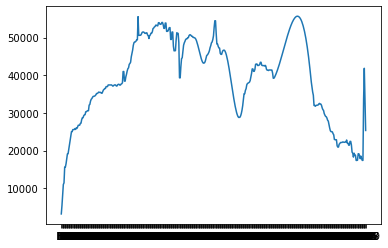

In [168]:
plt.plot(tarp_bands_df.iloc[0])

In [169]:
# get actual wavelengths from instrument
fenix_band_pathname = '/Users/jameswallace/Desktop/Project/FENIX_Bands.xlsx'

In [170]:
fenix_df = pd.read_excel(fenix_band_pathname, index_col= 'ID')

In [171]:
fenix_wavlengths = fenix_df['Wavelength']

In [172]:
tarp_bands_df.columns = np.asarray(fenix_wavlengths)

In [173]:
tarp_bands_df

,377.32,380.67,384.03,387.39,390.74,394.10,397.46,400.83,404.19,407.56,...,2448.16,2453.62,2459.08,2464.54,2470.00,2475.45,2480.91,2486.36,2491.81,2497.26
1,3188.0,5423.0,8059.0,10989.0,11441.0,15616.0,15616.0,16503.0,17817.0,19105.0,...,18663.0,17846.0,18530.0,17846.0,17400.0,17400.0,33733.0,41850.0,33733.0,25343.0
2,3187.0,5422.0,8563.0,10013.0,10772.0,14620.0,14620.0,14620.0,16116.0,16332.0,...,12284.0,12420.0,12241.0,12420.0,13145.0,14449.0,21148.0,27656.0,21148.0,15147.0
3,4209.0,5791.0,9032.0,10990.0,11838.0,16615.0,16873.0,17581.0,20371.0,20559.0,...,21414.0,20500.0,20500.0,20500.0,20415.0,20415.0,20415.0,45663.0,45663.0,33035.0
4,3833.0,5791.0,9031.0,9577.0,10161.0,13958.0,15281.0,16504.0,17817.0,19105.0,...,20887.0,20771.0,20179.0,20179.0,19938.0,21434.0,35292.0,46515.0,35292.0,26583.0
5,4209.0,5423.0,9925.0,10772.0,10990.0,14804.0,15282.0,16504.0,17818.0,19105.0,...,18663.0,17846.0,18530.0,17846.0,16641.0,16641.0,33733.0,41113.0,33733.0,23069.0
6,3833.0,5257.0,7500.0,9048.0,9572.0,12649.0,13141.0,13565.0,14458.0,15409.0,...,19129.0,19129.0,19186.0,20189.0,19961.0,21454.0,35538.0,46787.0,35538.0,24469.0
7,3833.0,5185.0,8059.0,9577.0,10161.0,13958.0,15942.0,16763.0,18459.0,19556.0,...,18792.0,17925.0,18792.0,18740.0,18740.0,18740.0,33850.0,44132.0,33850.0,24714.0


(750.0, 780.0)

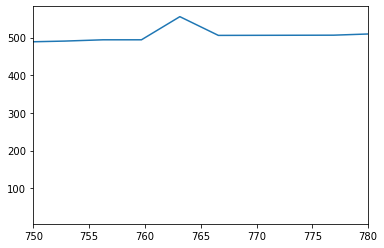

In [176]:
plt.plot(tarp_bands_df.iloc[0] / 100)

In [189]:
# now average each of the bands into a single array

irradiance_spectra = tarp_bands_df.mean()

Text(0, 0.5, 'Reflectance')

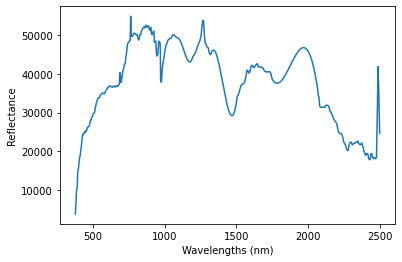

In [212]:
plt.plot((irradiance_spectra))
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Reflectance')

In [222]:
# get py6s irradiance

In [223]:
import sys

sys.path.append('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/data_processing_scripts/')

from tif_fluorescence_conversion import * # import the necessary FLD methods needed to convolute signals and retrieve SIF

In [224]:
py6s_pathname = '/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/py6s_generate_irradiance/17_06_2021_13:18_irradiance.csv'

In [225]:
py6s_irradiance = py6s_csv_to_array(py6s_pathname)

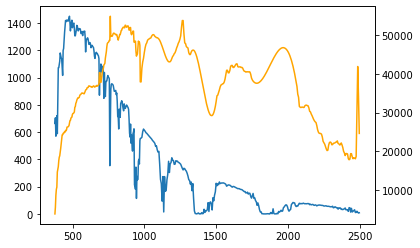

In [234]:
fig, ax = plt.subplots()
ax.plot(np.asarray(fenix_wavlengths), py6s_irradiance)
ax2=ax.twinx()
ax2.plot((irradiance_spectra), color = 'orange')